In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# import data

# HEY EVERYONE!

Just remember, if you ever feel lost, ask your peers, ask me or ask the internet!

If you feel comfortable using a Jupyter Notebook, feel free to reference the main.py file and write your code here!

In [2]:
df = pd.read_csv("./seg_eval_results/results.csv")
pc = pd.read_csv("./seg_eval_results/power_consumption.csv")

In [3]:
pc = pc.iloc[:, 5]
print(pc)

0    0.003067
1    0.005333
2    0.003467
3    0.006400
4    0.003867
5    0.008400
6    0.004000
7    0.009733
Name: Wh/it, dtype: float64


In [4]:
pc1 = pc[pc.index.map(lambda x: x%2==0)]
pc2 = pc[pc.index.map(lambda x: x%2==1)]

color1 = pc1.map(lambda x: ((x/pc1.max())**6))
color2 = pc2.map(lambda x: ((x/pc2.max())**6))

size1 = color1*10**3.5
size2 = color2*10**3.5

In [5]:
df

,Unnamed: 0,s,im_size,flops,num_params,miou,speed
0,0,0.5,512x256,149.397482,0.080342,0.400913,0.963713
1,1,0.5,1024x512,597.558896,0.080342,0.443691,3.305989
2,2,1.0,512x256,271.661034,0.234010,0.462039,1.267927
3,3,1.0,1024x512,1086.594672,0.234010,0.514186,4.147480
4,4,1.5,512x256,428.658154,0.468362,0.432542,1.574605
5,5,1.5,1024x512,1714.566256,0.468362,0.498647,5.131690
6,6,2.0,512x256,674.784234,0.789242,0.439168,1.893494
7,7,2.0,1024x512,2699.053680,0.789242,0.509071,6.148570


In [6]:
df_512 = df[df['im_size'] == "512x256"]
df_1024 = df[df['im_size'] == "1024x512"]
print(df_512, "\n", df_1024)

   Unnamed: 0    s  im_size       flops  num_params      miou     speed
0           0  0.5  512x256  149.397482    0.080342  0.400913  0.963713
2           2  1.0  512x256  271.661034    0.234010  0.462039  1.267927
4           4  1.5  512x256  428.658154    0.468362  0.432542  1.574605
6           6  2.0  512x256  674.784234    0.789242  0.439168  1.893494 
    Unnamed: 0    s   im_size        flops  num_params      miou     speed
1           1  0.5  1024x512   597.558896    0.080342  0.443691  3.305989
3           3  1.0  1024x512  1086.594672    0.234010  0.514186  4.147480
5           5  1.5  1024x512  1714.566256    0.468362  0.498647  5.131690
7           7  2.0  1024x512  2699.053680    0.789242  0.509071  6.148570


In [7]:
df_512 = df_512.reset_index()
df_1024 = df_1024.reset_index()

df_512 = df_512.iloc[:, 2:]
df_1024 = df_1024.iloc[:, 2:]

df_512.drop('im_size', axis = 1, inplace=True)
df_1024.drop('im_size', axis = 1, inplace=True)

print(df_512, "\n", df_1024)

     s       flops  num_params      miou     speed
0  0.5  149.397482    0.080342  0.400913  0.963713
1  1.0  271.661034    0.234010  0.462039  1.267927
2  1.5  428.658154    0.468362  0.432542  1.574605
3  2.0  674.784234    0.789242  0.439168  1.893494 
      s        flops  num_params      miou     speed
0  0.5   597.558896    0.080342  0.443691  3.305989
1  1.0  1086.594672    0.234010  0.514186  4.147480
2  1.5  1714.566256    0.468362  0.498647  5.131690
3  2.0  2699.053680    0.789242  0.509071  6.148570


In [8]:
X_1 = df_512['miou']
Y_1 = df_512['speed']
X_2 = df_1024['miou']
Y_2 = df_1024['speed']

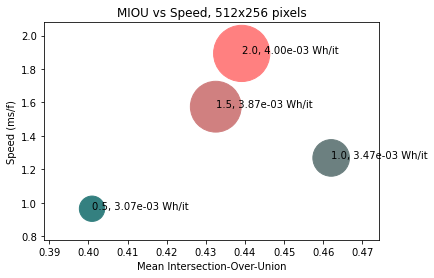

In [9]:
plt.scatter(X_1, Y_1, s=size1, c=[[i, 0.5, 0.5] for i in color1])
plt.xlabel("Mean Intersection-Over-Union")
plt.ylabel("Speed (ms/f)")
plt.margins(0.2)
plt.title("MIOU vs Speed, 512x256 pixels")
annotations = df_512['s']
numpc1 = pc1.to_numpy()
numpc2 = pc2.to_numpy()
for i, label in enumerate(annotations):
    plt.annotate(f"{label}, {numpc1[i]:.2e} Wh/it", (X_1[i], Y_1[i]))
plt.savefig('seg_eval_results/MIOU_vs_speed512.png')
plt.show()

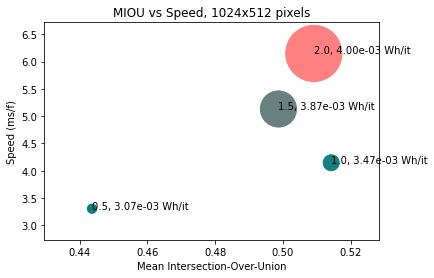

In [10]:
plt.scatter(X_2, Y_2, s=size2, c=[[i, 0.5, 0.5] for i in color2])
plt.xlabel("Mean Intersection-Over-Union")
plt.ylabel("Speed (ms/f)")
plt.margins(0.2)
plt.title("MIOU vs Speed, 1024x512 pixels")
annotations = df_1024['s']
for i, label in enumerate(annotations):
    plt.annotate(f"{label}, {numpc1[i]:.2e} Wh/it", (X_2[i], Y_2[i]))
plt.savefig('seg_eval_results/MIOU_vs_speed1024.png')
plt.show()